In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_12364\2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### A. 데이터 전처리 - 데이터 읽어오기

- Pandas를 사용하여 csv 파일(NLFX.csv)을 DataFrame으로 읽어옵니다.
- 이 때, ['Date','Open','High','Low','Close'] 필드만 읽어오도록 구성합니다

In [2]:
#csv 파일 경로
csv_path = "archive/NFLX.csv"
# csv 파일 읽어오기
df = pd.read_csv(csv_path, usecols=range(5))

# DataFrame 출력
df

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


### B. 데이터 전처리 – 2021년 이후의 종가 데이터 출력하기
- csv 파일을 DataFrame 으로 읽어와 2021년 이후의 데이터만 필터링합니다.
- [힌트] 필터링이 가능한 형식으로 데이터 타입을 변경한 후 필터링을 진행합니다.
- Pandas 의 to_datetime() 을 활용합니다.
- 필터링이 완료된 DataFrame 의 종가 데이터를 Matplotlib 를 사용하여 시각화 합니다.

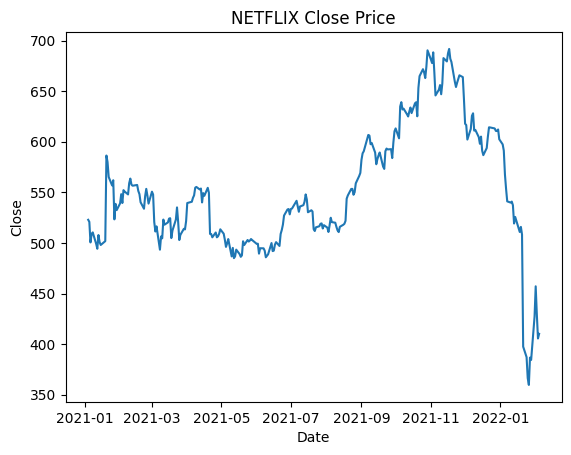

In [3]:
# 비교 가능하도록 데이터 타입 변경
df["Date"] = pd.to_datetime(df["Date"])

#새로운 df 생성(2021년 이후로 데이터 필터링)
df_after_2021 = df[df["Date"]>="2021-01-01"]

# 그래프 그리기 (가로, 세로 축에 표시될 데이터를 차례로 기입)
plt.plot(df_after_2021['Date'], df_after_2021['Close'])


# 그래프 제목 설정
plt.title('NETFLIX Close Price')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Close')

# 그래프 표시
plt.show()

### C. 데이터 분석 – 2021년 이후 최고, 최저 종가 출력하기
- csv 파일을 DataFrame 으로 읽어와 2021년 이후의 데이터만 필터링합니다.
- 종가(Close) 필드를 활용하여, 2021년 이후 가장 높은 종가와 가장 낮은 종가를 출력합니다.
- Pandas 의 내장 함수를 사용합니다.

In [4]:
# 값 정렬
df_after_2021['Close'].sort_values() # 이거 출력하면 key값 알 수 있다

#최저, 최고 종가 값 할당
min_one = df_after_2021['Close'][1001] # 키값이 int 형
max_one = df_after_2021['Close'][954]
print("최고 종가 :", max_one)
print("최저 종가 :", min_one)

최고 종가 : 691.690002
최저 종가 : 359.700012


### D. 데이터 분석 - 2021년 이후 월 별 평균 종가 출력하기
- csv 파일을 DataFrame 으로 읽어와 2021년 이후의 데이터만 필터링합니다.
- 월 별로 그룹화하여 평균 종가를 계산한 새로운 DataFrame 을 만들어 그래프로 시각화 합니다.

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_12364\1948825591.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_meanclose = df_after_2021.groupby(pd.Grouper(key='Date',freq='M')).mean().reset_index()


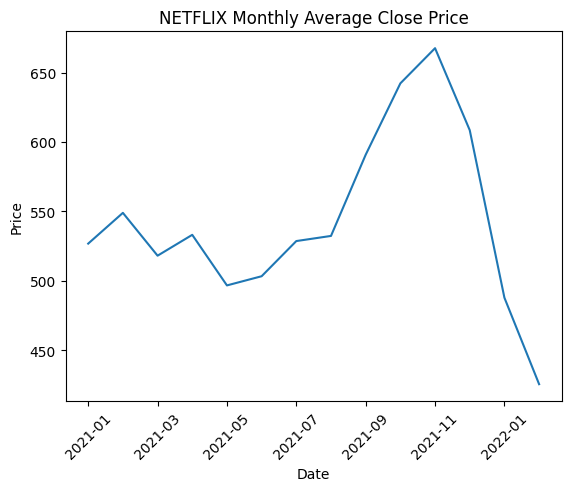

In [8]:
#groupby와 grouper로 close 데이터들을 달에 맞게 그룹화하고, 이후 mean()을 이용해 평균 출력 후 할당
df_meanclose = df_after_2021.groupby(pd.Grouper(key='Date',freq='M')).mean().reset_index()

df_meanclose['Date'] = df_meanclose['Date'].dt.strftime('%Y-%m')

# 그래프 그리기 (가로, 세로 축에 표시될 데이터를 차례로 기입)
plt.plot(df_meanclose['Date'], df_meanclose['Close'])


# 그래프 제목 설정
plt.title('NETFLIX Monthly Average Close Price')

# x축 레이블 설정
plt.xlabel('Date')

# x 축 설정(회전시키기) ****
plt.xticks(df_meanclose['Date'][::2], rotation=45)
#step으로 레이블에 나타나는 애들을 1,3,5... 만

# y축 레이블 설정
plt.ylabel('Price')

# 그래프 표시
plt.show()

### E. 데이터 시각화 – 2022년 이후 최고, 최저, 종가 시각화하기
- csv 파일을 DataFrame 으로 읽어와 2022년 이후의 데이터만 필터링합니다.
- Matplotlib 를 활용하여 3가지 필드를 한 번에 분석할 수 있도록 아래와 같이 시각화 합니다.

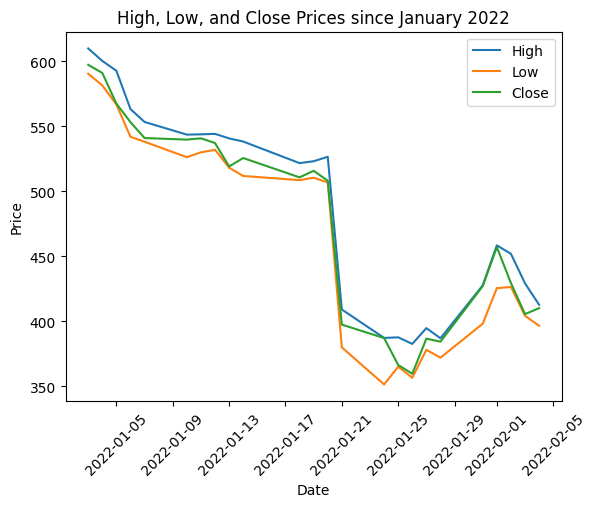

In [6]:
#새로운 df 생성(2022년 이후로 데이터 필터링)
df_after_2022 = df[df["Date"]>="2022-01-01"]

plt.plot(df_after_2022['Date'], df_after_2022['High'], label='High')
plt.plot(df_after_2022['Date'], df_after_2022['Low'], label='Low')
plt.plot(df_after_2022['Date'], df_after_2022['Close'], label='Close')

plt.title('High, Low, and Close Prices since January 2022')

plt.xlabel('Date')

plt.ylabel('Price')

plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()